In [0]:
import itertools
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [2]:
listing_df = pd.read_csv("https://raw.githubusercontent.com/build-week-optimal-pricing/Data-science/master/data/listings.csv")
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,cafeheaven Pberg/Mitte,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,21,60,18,2018-11-11,0.24,1,251
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.14,1,344
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.35,1,317
3,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,128,2019-10-21,1.08,1,20
4,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,3,266,2019-11-09,2.13,2,30


In [3]:
listing_df.isna().sum()

id                                   0
name                                51
host_id                              0
host_name                           28
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4081
reviews_per_month                 4081
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [4]:
listing_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
listing_df[listing_df.isnull().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
140,193601,"Well located, cozy 2 rooms apartment, all clos...",939230,Nana M,Pankow,Pankow Süd,52.55522,13.42307,Entire home/apt,75,3,0,NaN,NaN,1,0
152,200125,TOP apartment in art nouveau villa,977942,Rainer,Steglitz - Zehlendorf,Zehlendorf Nord,52.43737,13.22266,Entire home/apt,89,60,0,NaN,NaN,1,312
160,208495,CENTRAL VINTAGE-MODERN FLAT,965569,Coco,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51275,13.46358,Entire home/apt,150,2,0,NaN,NaN,1,0
201,242908,Holiday Apartment in Berlin Wannsee with balcony,1275359,Henning,Steglitz - Zehlendorf,Zehlendorf Südwest,52.41558,13.16418,Entire home/apt,95,5,0,NaN,NaN,2,284
245,255201,Beautiful and modern rooms (DBZ),1340959,Sybille,Charlottenburg-Wilm.,Schloß Charlottenburg,52.51260,13.29270,Entire home/apt,40,1,0,NaN,NaN,10,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24581,40055760,Das ist eine gute Idee aber,308937636,Gcvb,Mitte,Alexanderplatz,52.53395,13.37909,Entire home/apt,77,1,0,NaN,NaN,1,73
24582,40057919,Spacious apartment in Bergmannkiez,2825203,Christoph,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.49171,13.39808,Entire home/apt,140,1,0,NaN,NaN,2,9
24583,40061108,A lovely room in Prenzlauer Berg,33523795,Einat,Pankow,Helmholtzplatz,52.54515,13.42161,Private room,20,2,0,NaN,NaN,1,13
24584,40070345,Chilled room in shared apartment,151694237,Sagir,Neukölln,Neuköllner Mitte/Zentrum,52.47714,13.43017,Private room,35,4,0,NaN,NaN,3,303


In [6]:
listing_df["last_review"].value_counts()

2019-11-10    590
2019-11-03    506
2019-10-27    453
2019-11-11    432
2019-10-28    353
             ... 
2014-12-19      1
2015-11-19      1
2014-05-02      1
2014-08-25      1
2015-04-27      1
Name: last_review, Length: 1618, dtype: int64

In [0]:
listing_df = listing_df.fillna({"last_review": "1900-01-01"})
listing_df = listing_df.fillna({"reviews_per_month": "0"})

In [8]:
listing_df["neighbourhood_group"] = listing_df["neighbourhood_group"].astype('category')
listing_df["neighbourhood"] = listing_df["neighbourhood"].astype('category')
listing_df["room_type"] = listing_df["room_type"].astype('category')
listing_df.dtypes

id                                   int64
name                                object
host_id                              int64
host_name                           object
neighbourhood_group               category
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                   object
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

In [9]:
listing_df["neighbourhood_group_cat"] = listing_df["neighbourhood_group"].cat.codes
listing_df["neighbourhood_cat"] = listing_df["neighbourhood"].cat.codes
listing_df["room_type_cat"] = listing_df["room_type"].cat.codes
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_cat,neighbourhood_cat,room_type_cat
0,1944,cafeheaven Pberg/Mitte,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,21,60,18,2018-11-11,0.24,1,251,4,17,2
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.14,1,344,6,100,0
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.35,1,317,10,112,2
3,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,128,2019-10-21,1.08,1,20,1,33,0
4,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,3,266,2019-11-09,2.13,2,30,6,50,2


In [10]:
import plotly.express as px
px.scatter(listing_df, x='price', y='calculated_host_listings_count')


In [11]:
px.scatter(listing_df, x='calculated_host_listings_count', y='price', color='room_type_cat', opacity=0.1)

In [12]:
px.scatter(
    listing_df,
    x='neighbourhood_group_cat',
    y='price',
    text='neighbourhood_cat',
    title='US Presidential Elections, 1952-2004',
    trendline='ols',  # Ordinary Least Squares
)

In [0]:
def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(df, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    
    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

In [14]:
regression_3d(
    listing_df,
    x='neighbourhood_cat', 
    y='room_type_cat', 
    z='neighbourhood_group_cat', 
    text='price', 
    title='US Presidential Elections, 1952-2004'
)

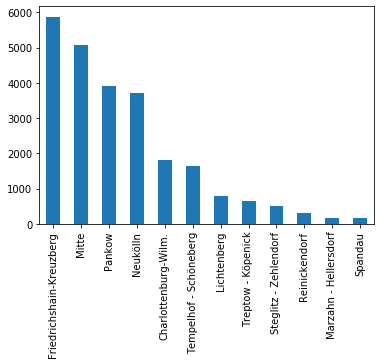

In [24]:
listing_df['neighbourhood_group'].value_counts().plot(kind='bar')

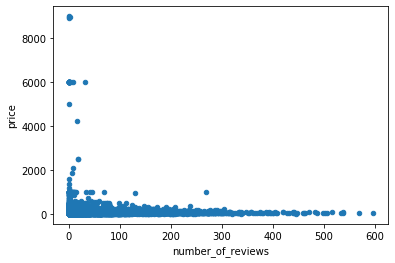

In [30]:
listing_df.plot.scatter(x= 'number_of_reviews', y='price');

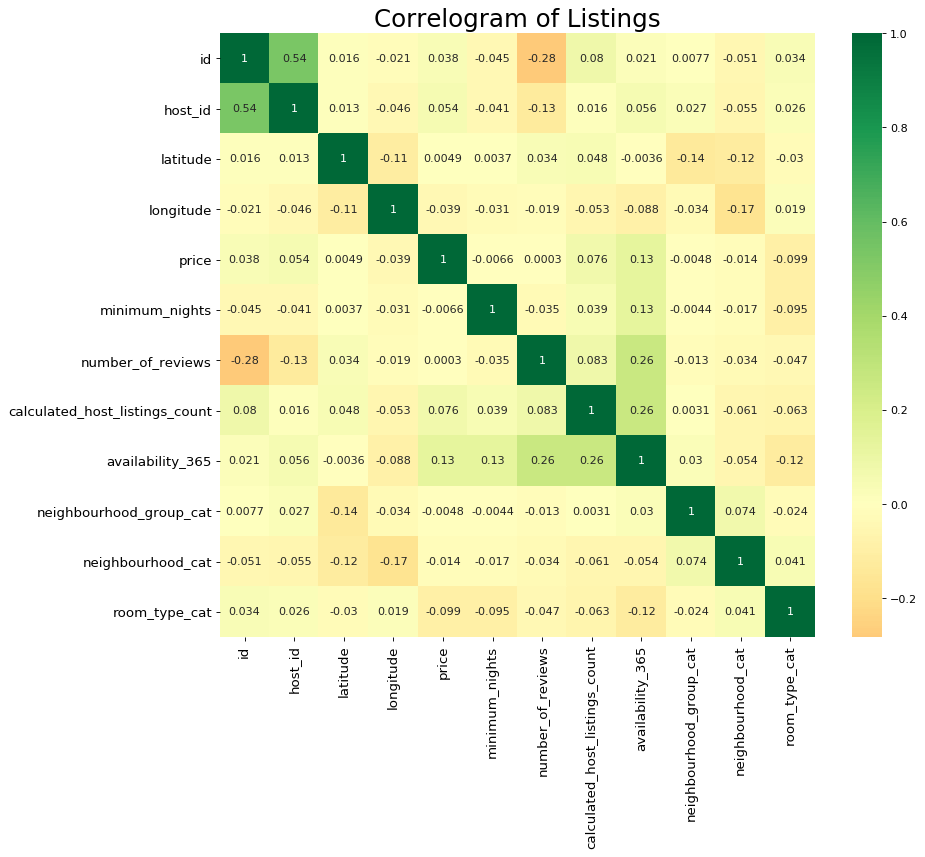

In [38]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(listing_df.corr(), xticklabels=listing_df.corr().columns, yticklabels=listing_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Listings', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()